# Mapper

Mapper is an algorithm for topological data analysis (TDA). TDA identifies structures in data by focussing on its connectivity, rather than on clusters. Mappers achieves this by repeatadly grouping data according to a filter value and then clustering within these groups. The groupings are overlapping, and clusters in different groups that share data points, are connected.

In [1]:
import numpy as np
import mapper
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Using cmappertools v1.0.24.


## Examples

In [2]:
N = 1000

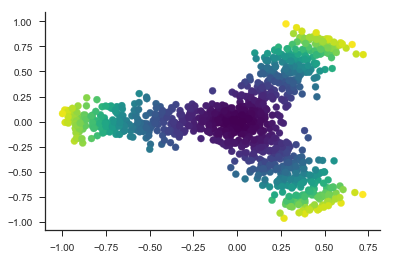

In [3]:
n = N // 3
x = np.random.rand(3 * n)
y = np.random.normal(size= 3 * n) / 10
Y = np.vstack([x, y]).transpose()

Y[:n, 0] *= -1

theta = np.radians(60)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s), (s, c)))
Y[n:n * 2] = (R@Y[n:n * 2].transpose()).transpose()

R2 = np.array(((c, s), (-s, c)))
Y[n *2:] = (R2@Y[n * 2:].transpose()).transpose()

plt.scatter(Y[:, 0], Y[:, 1], c=mapper.filters.eccentricity(Y), cmap='viridis')
sns.despine()
plt.show()

There are 26 nodes.


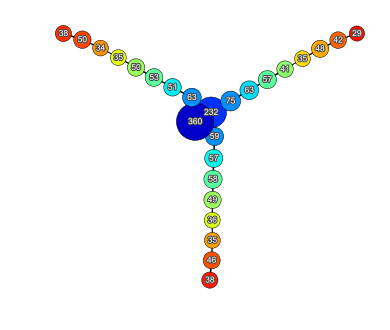

In [4]:
mapper_output = mapper.mapper(
    Y, mapper.filters.eccentricity(Y), mapper.cover.cube_cover_primitive(), 
    mapper.cutoff.first_gap(0.1), verbose=False)
mapper_output.draw_2D(legend=False)
plt.show()

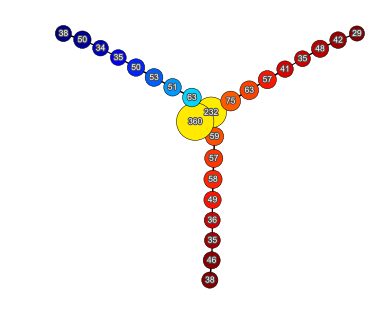

In [5]:
node_color = mapper_output.postprocess_node_color(None, Y[:, 0])
mapper_output.draw_2D(legend=False, node_color=node_color)
plt.show()

There are 11 nodes.


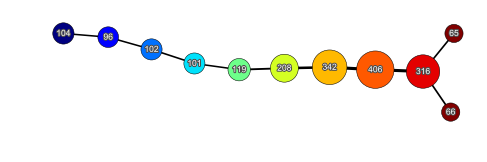

In [6]:
mapper_output = mapper.mapper(
    Y, Y[:,0], mapper.cover.cube_cover_primitive(), 
    mapper.cutoff.first_gap(0.2), verbose=False)
node_color = mapper_output.postprocess_node_color(None, Y[:, 0])
mapper_output.draw_2D(legend=False, node_color=node_color)
plt.show()

There are 12 nodes.


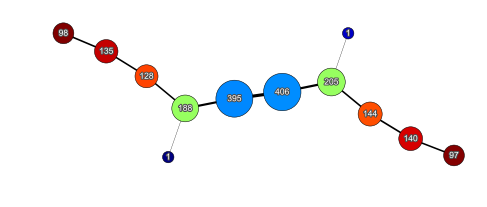

In [7]:
mapper_output = mapper.mapper(
    Y, Y[:,1], mapper.cover.cube_cover_primitive(), 
    mapper.cutoff.first_gap(0.2), verbose=False)
node_color = mapper_output.postprocess_node_color(None, Y[:, 0])
mapper_output.draw_2D(legend=False, node_color=node_color)
plt.show()

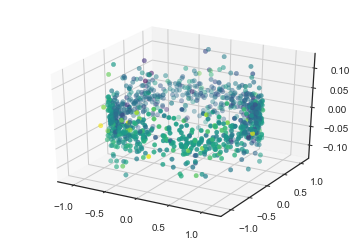

In [8]:
R = 1
r = 0.05 * np.random.normal(size=N)
phi = 2 * np.pi * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)

x = (R + r * np.cos(theta)) * np.cos(phi)
y = (R + r * np.cos(theta)) * np.sin(phi)
z = r * np.sin(theta)

torus = np.vstack([x, y, z]).transpose()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=mapper.filters.eccentricity(torus), cmap='viridis')
plt.show()

There are 10 nodes.


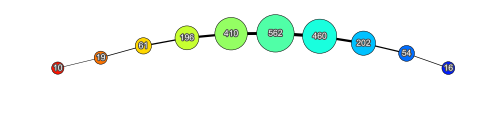

In [9]:
mapper_output = mapper.mapper(
    torus, mapper.filters.eccentricity(torus), mapper.cover.cube_cover_primitive(), 
    mapper.cutoff.first_gap(0.4), verbose=False)
mapper_output.draw_2D(legend=False)
plt.show()

There are 19 nodes.


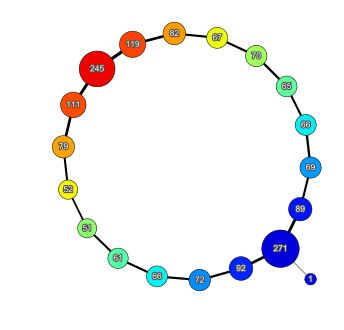

In [10]:
mapper_output = mapper.mapper(
    torus, torus[:,0], mapper.cover.cube_cover_primitive(), 
    mapper.cutoff.first_gap(0.1), verbose=False)
mapper_output.draw_2D(legend=False)
plt.show()

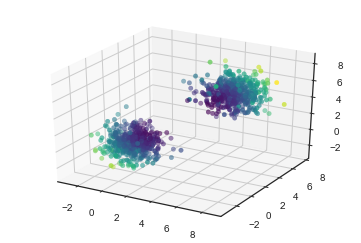

In [11]:
n = N // 2
two_clouds = np.random.normal(size=(2 * n, 3))
two_clouds[:n] += 5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(two_clouds[:, 0], two_clouds[:, 1], two_clouds[:, 2], 
           c=mapper.filters.eccentricity(two_clouds), cmap='viridis')
plt.show()

There are 20 nodes.


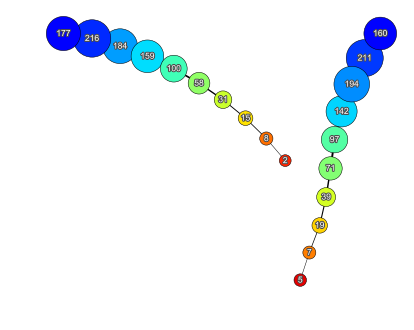

In [12]:
mapper_output = mapper.mapper(
    two_clouds, mapper.filters.eccentricity(two_clouds), 
    mapper.cover.cube_cover_primitive(), 
    mapper.cutoff.first_gap(0.1), verbose=False)
mapper_output.draw_2D(legend=False)
plt.show()

## Filter functions

Minimal epsilon: 0.112952.
Density of the adjacency matrix: 72.54%.
Eigenvalues: [1.08244982e-16 6.44006829e-01].
Eigenvalues:
[-225.77076114]


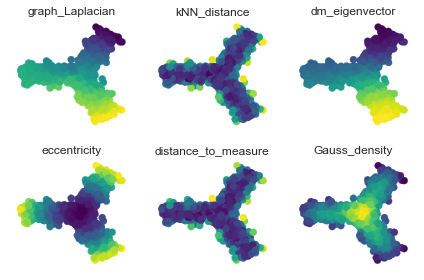

In [13]:
filters = {
    mapper.filters.eccentricity: 1, mapper.filters.Gauss_density: 0.2, 
    mapper.filters.kNN_distance: 5, mapper.filters.distance_to_measure: 5, 
    mapper.filters.graph_Laplacian: 1, mapper.filters.dm_eigenvector: 0}

for i, (fltr, par) in enumerate(filters.items()):
    plt.subplot(2, 3, i + 1)
    plt.scatter(Y[:, 0], Y[:, 1], c=fltr(Y, par), cmap='viridis')
    plt.xticks([])
    plt.yticks([])
    plt.title(fltr.__name__)

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

## Cutoff functions

There are 26 nodes.
There are 20 nodes.
There are 26 nodes.
There are 26 nodes.


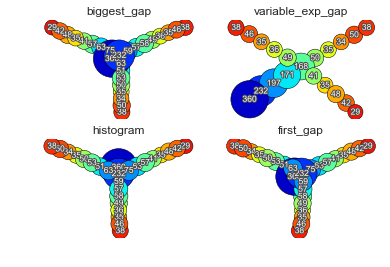

In [14]:
cutoffs = {
    mapper.cutoff.biggest_gap: None,
    mapper.cutoff.first_gap: 0.1,
    mapper.cutoff.histogram: 10,
    mapper.cutoff.variable_exp_gap: 0.1}

for i, (coff, par) in enumerate(cutoffs.items()):
    ax = plt.subplot(2, 2, i + 1)
    plt.title(coff.__name__)
    if par:
        coff = coff(par)
    else:
        coff = coff()
    mapper_output = mapper.mapper(
        Y, mapper.filters.eccentricity(Y), mapper.cover.cube_cover_primitive(), 
        coff, verbose=False)
    mapper_output.draw_2D(ax, legend=False)

plt.show()